**Graduation Project**: PM Footprint calculator based on citizen behavior related to fine dust emissions.

Student: **Alessandro Monolo** | 1790210

GP supervisor: Angelique Ruiter

Master Data-Driven Design, Hogeschool Utrecht.

Academical Year: 2021/2022, Block C.

## 1 - Survey Dataframe Cleaning & Visualization

In [906]:
# Import the Python Libraries I need to clean, pre-process and visualize the data contained into the survey PM dataframe:

In [907]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from matplotlib import cm
%matplotlib inline

In [908]:
# Import translated dataframe with the name: df_survey

In [909]:
df_survey = pd.read_csv("df_survey_eng.csv", index_col=False)

In [910]:
# Print the first 5 rows and the info of the df_survey dataframe:

In [911]:
#df_survey.head(5)

In [912]:
# Print main information about df_survey:

In [913]:
#df_survey.info()

In [914]:
# Now I check if there are any missing values among the CSV file which can represent inconsisten
# votes printing the whole df by a heatmap visualization to better visualize the NaN values:

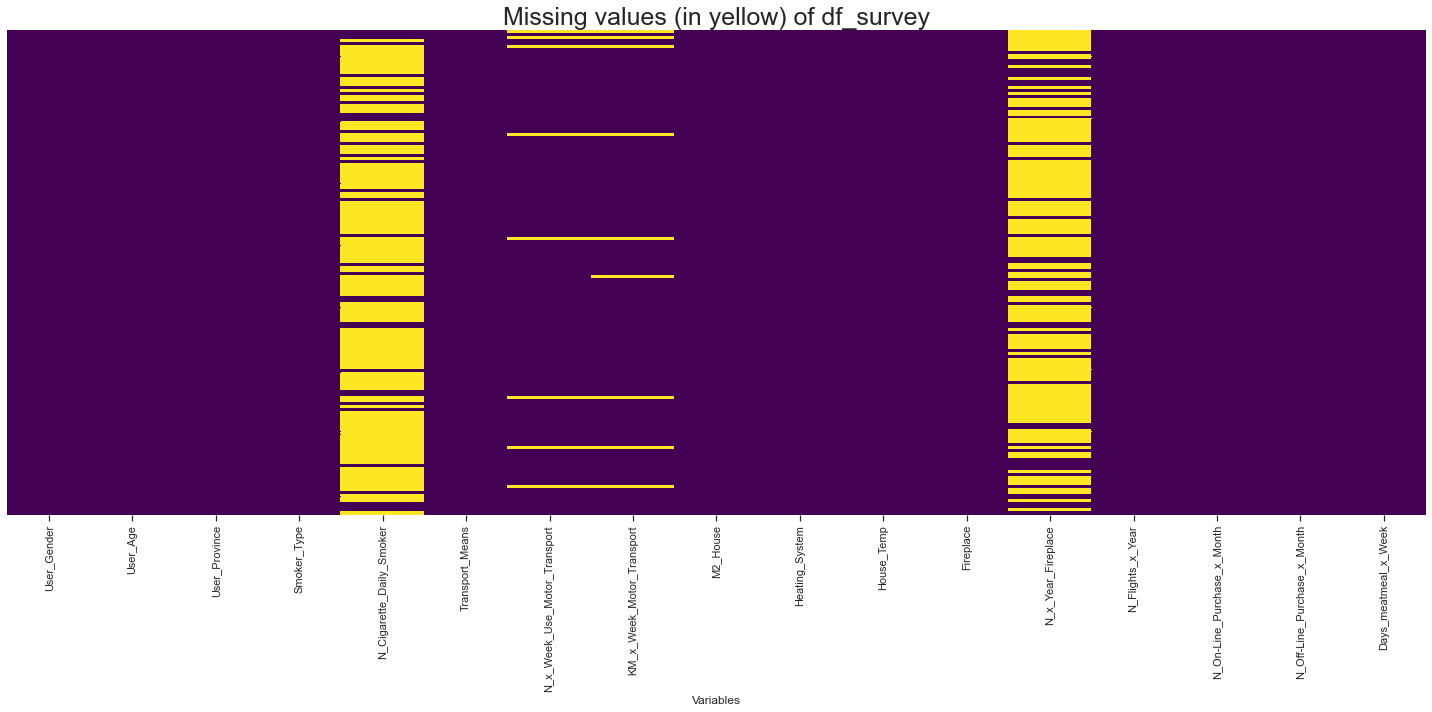

In [915]:
plt.figure(figsize=(20,10))
sns.heatmap(df_survey.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing values (in yellow) of df_survey', size=25)
plt.xlabel('Variables', size=12)
plt.tight_layout()
plt.show()

In [916]:
# After checking the missing value I can see one respondent did not complete properly the survey.
#In particular, where was asked to answer how many KM you driveuse the motor transport per week,
#the answer was not given, after answering to the previous question, how many times you use the motor transport.
#Let check which respondent was.

In [917]:
# In order to find the inconsistent vote I will create a sub-dataframe where only
# the NaN for the column "KM_x_Week_Motor_Transport" are included:

In [918]:
df_missing_1 = df_survey[df_survey['KM_x_Week_Motor_Transport'].isnull()]
df_missing_1

,User_Gender,User_Age,User_Province,Smoker_Type,N_Cigarette_Daily_Smoker,Transport_Means,N_x_Week_Use_Motor_Transport,KM_x_Week_Motor_Transport,M2_House,Heating_System,House_Temp,Fireplace,N_x_Year_Fireplace,N_Flights_x_Year,N_On-Line_Purchase_x_Month,N_Off-Line_Purchase_x_Month,Days_meatmeal_x_Week
0,Woman,18 - 24,Milano,Daily Smoker,1 to 5,Public transport,NaN,NaN,40,Traditional radiator heating,18-19,0,NaN,6,1 to 5,6 to 10,3 to 4
2,Woman,18 - 24,Pavia,Daily Smoker,1 to 5,Public transport,NaN,NaN,35,Traditional radiator heating,22-23,0,NaN,4,1 to 5,1 to 5,3 to 4
5,Man,18 - 24,Milano,No smoker,NaN,Public transport,NaN,NaN,160,Traditional radiator heating,20-21,0,NaN,4,1 to 5,1 to 5,1 to 2
35,Woman,25 - 30,Milano,No smoker,NaN,Public transport,NaN,NaN,50,Traditional radiator heating,20-21,0,NaN,8,1 to 5,1 to 5,3 to 4
70,Woman,18 - 24,Milano,No smoker,NaN,Public transport,NaN,NaN,70,Traditional radiator heating,18-19,0,NaN,2,1 to 5,1 to 5,1 to 2
83,Woman,18 - 24,Milano,No smoker,NaN,Public transport,≥15,NaN,100,Traditional radiator heating,18-19,0,NaN,0,1 to 5,6 to 10,7
124,Woman,18 - 24,Pavia,No smoker,NaN,Bicycle,NaN,NaN,80,Traditional radiator heating,20-21,0,NaN,10,1 to 5,1 to 5,1 to 2
141,Woman,18 - 24,Lecco,No smoker,NaN,Public transport,NaN,NaN,45,Traditional radiator heating,20-21,0,NaN,2,1 to 5,6 to 10,1 to 2
154,Woman,18 - 24,Milano,No smoker,NaN,Motor car,NaN,NaN,140,Traditional radiator heating,20-21,1,1 to 20,2,1 to 5,6 to 10,3 to 4


In [919]:
# Respondent 83 voted public transport as main transport mean,
# but ≥15 as number of times when she use the motor transport per week, thus, this vote is inconsistent.

In [920]:
# Based on multiple column conditions, now I substite the inconsistent value with NaN value:

In [921]:
df_survey.loc[(df_survey['Transport_Means'] == "Public transport") & (df_survey['Days_meatmeal_x_Week'] == "7") & (df_survey['M2_House'] == 100) & (df_survey['N_Off-Line_Purchase_x_Month'] == "6 to 10") & (df_survey['User_Gender'] == "Woman") & (df_survey['User_Age'] == "18 - 24"), 'N_x_Week_Use_Motor_Transport'] = np.nan

In [922]:
# A second heatmap in order to check if now the vote is consistent:

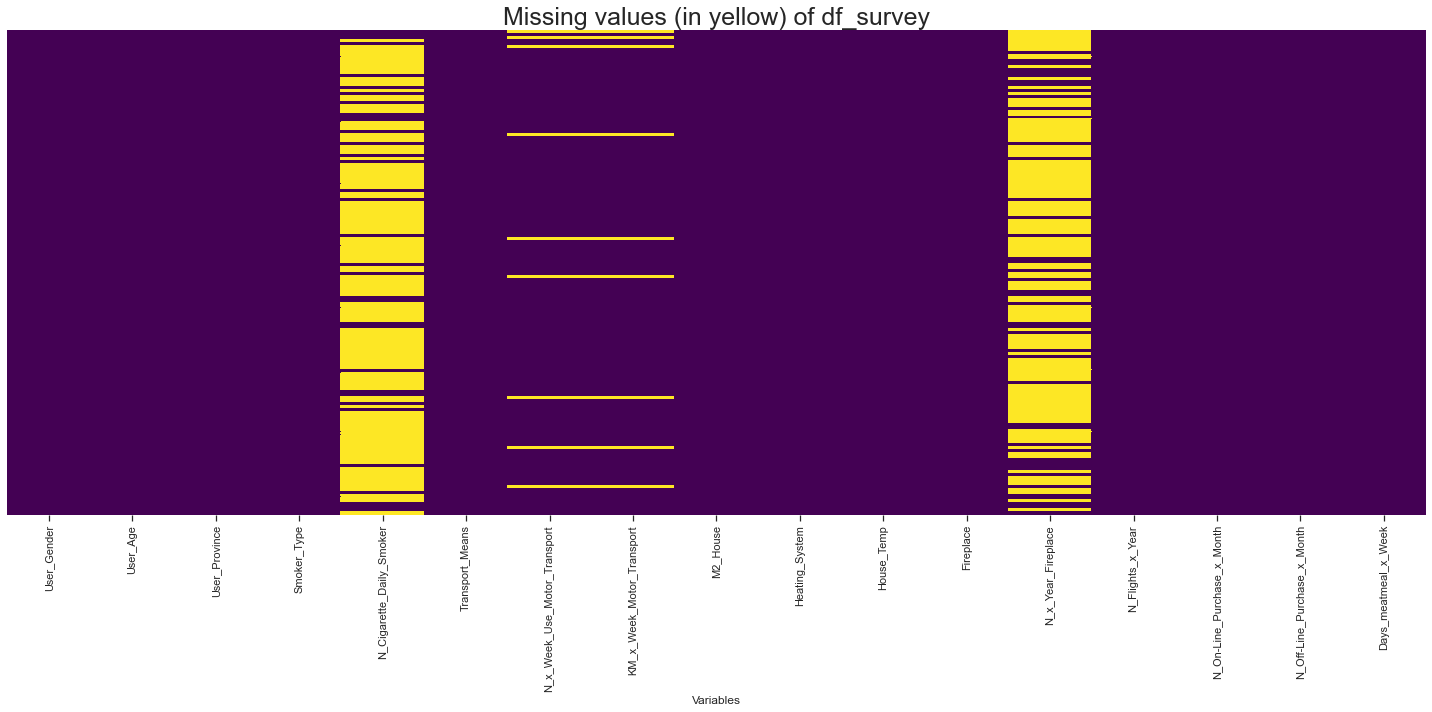

In [923]:
plt.figure(figsize=(20,10))
sns.heatmap(df_survey.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing values (in yellow) of df_survey', size=25)
plt.xlabel('Variables', size=12)
plt.tight_layout()
plt.show()

In [924]:
# Check outliers in M2_house column, printing a scatterplot finding possible correlation between dimension
# of house and number of flights:

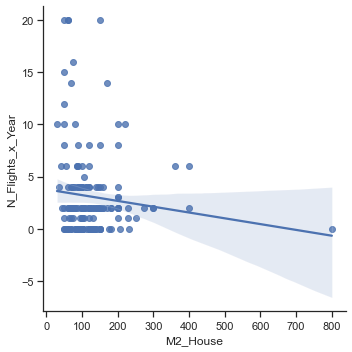

In [925]:
sns.lmplot(x="M2_House", y="N_Flights_x_Year", data=df_survey, x_jitter=.05)

In [926]:
# Apparently there is a negative correlation between the two variables.
# Furthermore, an outlier is present into the M2_House column, with a house dimension equals to 800 M2.

In [927]:
# Previously getting the mean of the M2_house column, this will be applied in place of all the outliers present in the same
# df column thorugh the new house_outlier function:

In [928]:
house_mean = df_survey['M2_House'].mean()

In [929]:
def house_outlier(x):
    if(x > 500): 
        return int(house_mean)
    else: 
        return x

In [930]:
# The house_outlier function is applied to the above mentioned df column m2_House:

In [931]:
df_survey['M2_House'] = df_survey['M2_House'].apply(house_outlier)

In [932]:
# Finally, here I print a histogram plot to check if the values of the M2_House (distributed by genders)
# has no more any outliers:

<Figure size 1080x1080 with 0 Axes>

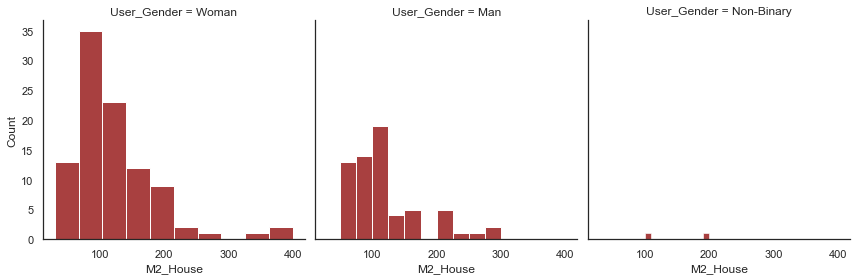

In [933]:
plt.figure(figsize=(15,15))
sns.set_style('white')
facetgrid = sns.FacetGrid(df_survey, col="User_Gender", height=4.0, aspect=1) # Here I set the columns and the rows variable
facetgrid.map(sns.histplot, "M2_House", bins=10, color='darkred')
plt.show()

In [934]:
# The above gender distribution shows how most of the women present within my survey live in houses between 70 and 100 M2;
# While men live in bigger houses, around 100 and 120 M2. 

In [935]:
# Check distribution of flights per year among different gender types:

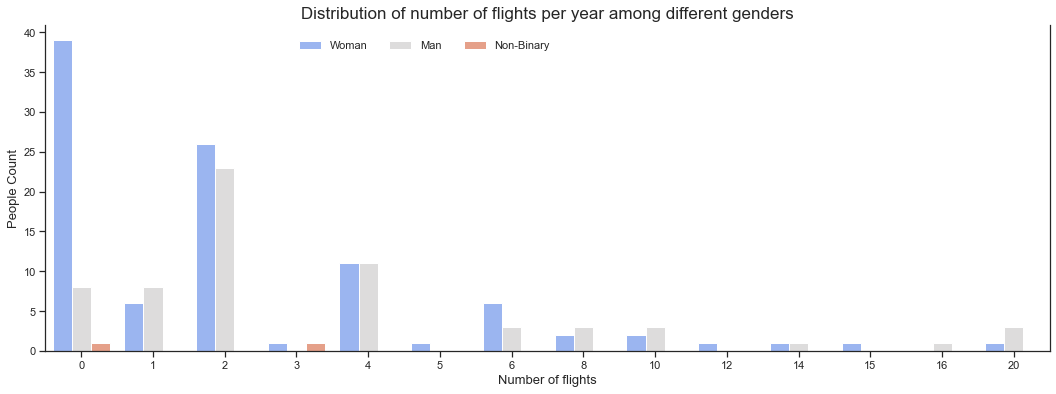

In [936]:
plt.figure(figsize=(18,6))
sns.set_style('ticks')

sns.countplot(data=df_survey, x='N_Flights_x_Year', hue='User_Gender', palette= "coolwarm")

plt.legend(loc="upper right", ncol=3, bbox_to_anchor=(-0.488, 0.88, 1., .102), frameon=False)
plt.title('Distribution of number of flights per year among different genders', fontsize=17)
plt.xlabel('Number of flights', fontsize=13)
plt.ylabel('People Count', fontsize=13)
sns.despine(left=False, bottom=False, top=True, right=False)
plt.show()

In [937]:
# Apparently women flight less then men in this survey. Most common values are 0 and 2, secondarly 4 flights.

In [938]:
# Now I creeate two different sub dataframes: One for Daily smokers and one for No smokers;
# This can help me to better understand which trend typify the different users (by age and gender distribution).

In [939]:
df_daily_smoker = df_survey.loc[(df_survey["Smoker_Type"] == "Daily Smoker")]

In [940]:
df_no_smoker = df_survey.loc[(df_survey["Smoker_Type"] == "No smoker")]

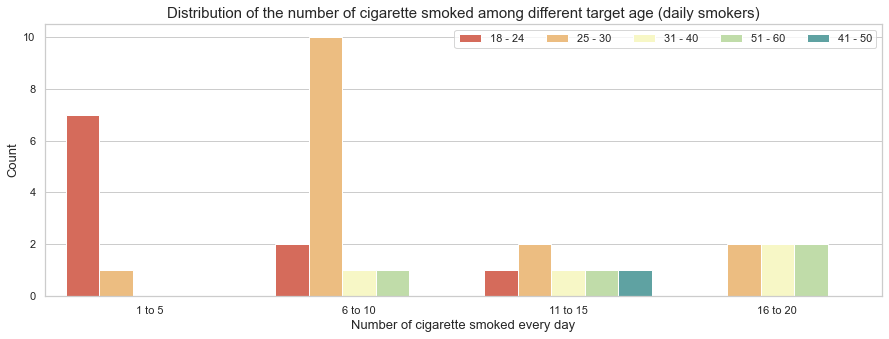

In [941]:
plt.figure(figsize=(15,5))
sns.set_style('whitegrid')
sns.countplot(data=df_daily_smoker, x='N_Cigarette_Daily_Smoker', hue='User_Age', palette= "Spectral")
plt.legend(loc="upper right", ncol=5 )
plt.title('Distribution of the number of cigarette smoked among different target age (daily smokers)', fontsize=15)
plt.xlabel('Number of cigarette smoked every day', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

In [942]:
# From this count plot I can see how the most common smoke behavior among daily smoker is to smoke 1 to 5 cigarette
# for young people (18-24 yo).
# For people who are 25-30 yo, they smoke pricipally from 6 to 10 cigarette per day.
# In conclusion we can see how older participants tend to smoke more cigarette per day.

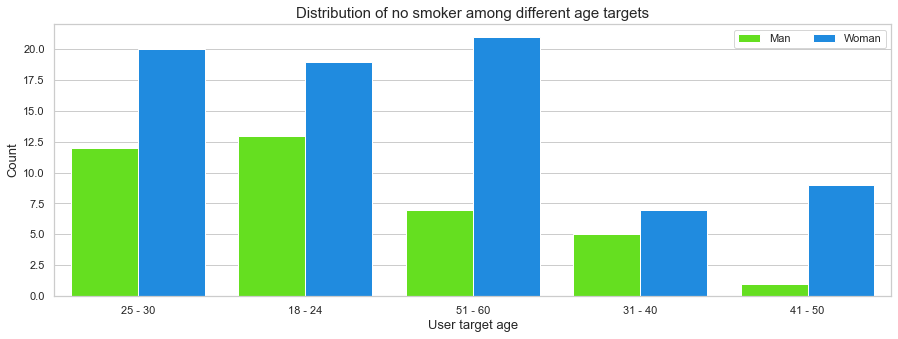

In [943]:
plt.figure(figsize=(15,5))
sns.set_style('whitegrid')
sns.countplot(data=df_no_smoker, x="User_Age", hue="User_Gender", palette= "gist_rainbow")
plt.legend(loc="upper right", ncol=2)
plt.title('Distribution of no smoker among different age targets', fontsize=15)
plt.xlabel('User target age', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

In [944]:
# From this second count plot I can clearly see how for older users, women tend to be no-smoker type,
# While men tend to be less.
# Furthermore, this difference become wider up to the age of 40 yo, while before this gap is lower.
# Maybe, women tend to do not smoker after preganancy, while men keep to have this habit.

In [945]:
# Now, I create other two sub dataframe:
# The first is obtained merging both users who voted as main transport means bicycle and public transort;

In [946]:
df_green_transport_user = df_survey.loc[(df_survey["Transport_Means"] == "Bicycle") | (df_survey["Transport_Means"] == "Public transport")]

In [947]:
# While the second sub dataframe is obtained merging the users who voted motorcycle, car or hibryd car as main
# transport means.

In [948]:
df_not_green_transport_user = df_survey.loc[(df_survey["Transport_Means"] == "Motor car") | (df_survey["Transport_Means"] == "Motorcycle") | (df_survey["Transport_Means"] == "Hybrid car")]

In [949]:
# Here I visualize how the age and gender distribution is among users who adopted a greener transportantion means,
# through a double pie chart:

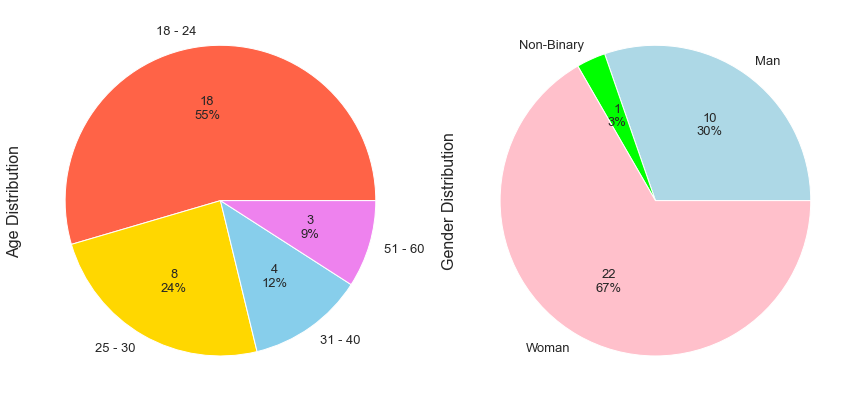

In [950]:
def label_function(val):
    return f'{val / 100 * len(df_green_transport_user):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))

df_green_transport_user.groupby('User_Age').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 13},
                                  colors=['tomato', 'gold', 'skyblue', 'violet', 'brown'], ax=ax1)

df_green_transport_user.groupby('User_Gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 13},
                                 colors=['lightblue', 'lime', 'pink'], ax=ax2)

ax1.set_ylabel('Age Distribution', size=16)
ax2.set_ylabel('Gender Distribution', size=16)

plt.tight_layout()
plt.show()

In [951]:
# Participants between 18 and 24 years old represent more than half of the total amount of green-user who adopted
# a bicycle or public transportation as transport means.
# Furthermore, 2/3 of the green-user are represented by female gender.

In [952]:
# Here I visualize how the age and gender distribution is among users who adopted a non-sustainable transportantion means,
# through a double pie chart:

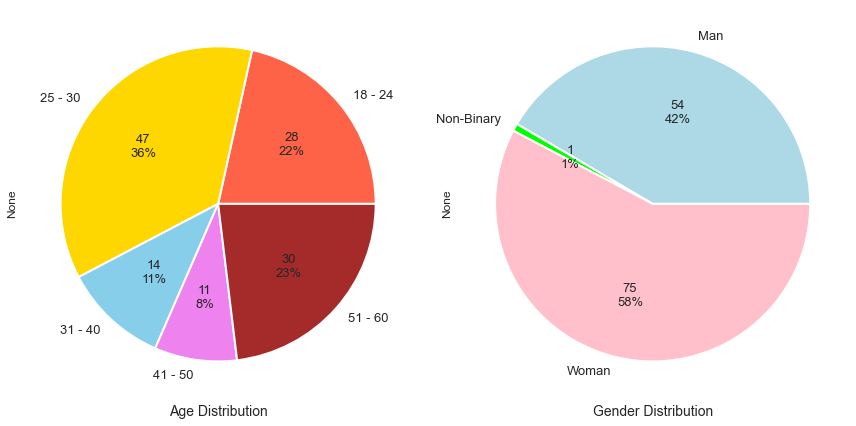

In [953]:
def label_function(val):
    return f'{val / 100 * len(df_not_green_transport_user):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))

df_not_green_transport_user.groupby('User_Age').size().plot(kind='pie',
                                                            autopct=label_function,
                                                            textprops={'fontsize': 13},
                                                            colors=['tomato', 'gold', 'skyblue', 'violet', 'brown'],
                                                            ax=ax1,
                                                            wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
                                                            pctdistance=0.6)

df_not_green_transport_user.groupby('User_Gender').size().plot(kind='pie',
                                                               autopct=label_function,
                                                               textprops={'fontsize': 13},
                                                               colors=['lightblue', 'lime', 'pink'],
                                                               ax=ax2,
                                                               wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
                                                               pctdistance=0.6)

ax1.set_xlabel('Age Distribution', size=14)
ax2.set_xlabel('Gender Distribution', size=14)

plt.tight_layout()
plt.show()

In [954]:
# Voters who selcted non-sustainable transport means are more equal between age and gender distribution.

In [955]:
# Plot demographical visualizations to show age and gender distribution among different Lombard provinces:

In [956]:
df_demo_province = df_survey.groupby(['User_Province', 'User_Age']).size()

In [957]:
df_demo_total = df_survey.groupby('User_Province').size()

In [958]:
df_percentage = (df_demo_province/df_demo_total)*100

In [959]:
df_percentage_1 = df_percentage.to_frame()
df_percentage_1 = df_percentage_1.reset_index()
df_percentage_1 = df_percentage_1.rename(columns= {0: 'Percentage'})
decimals = 1    
df_percentage_1['Percentage'] = df_percentage_1['Percentage'].apply(lambda x: round(x, decimals))

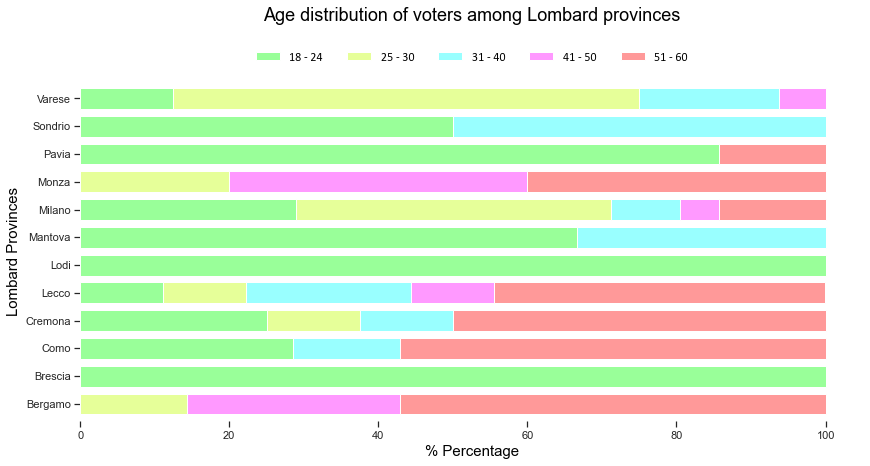

In [960]:
sns.set(rc={'figure.figsize':(17,7)})
sns.set_style('ticks')

colors = ['#99ff99','#e6ff99', '#99ffff', '#ff99ff', '#ff9999']

df_percentage_1.groupby(['User_Province','User_Age']).sum().unstack().plot(kind= 'barh',
                                                                           y= 'Percentage',
                                                                           stacked = True,
                                                                           width=0.75,
                                                                           color=colors)

legend = plt.legend(loc='center',
       frameon=False,
       bbox_to_anchor=(0., 1.02, 1., .102),  
       ncol=5, 
       borderaxespad=-.16,
       prop={'size': 12, 'family':'Calibri'})

for text in legend.get_texts():
    plt.setp(text, color='#000000')

title = plt.title('Age distribution of voters among Lombard provinces', pad=60, fontsize=18, color='#000000')
title.set_position([.5, 1])
plt.subplots_adjust(top=0.8, left=0.26)


plt.xlabel('% Percentage', fontsize=15, color='#000000')
plt.ylabel('Lombard Provinces', fontsize=15, color='#000000')

sns.despine(left=True, bottom=True, top=True, right=True)

plt.show()

In [961]:
# From this visualization I can see how voters are not equally distributed among Lombard provinces. 
# 18/24 and 51/60 emerge from this plot, while 31/40 and 41/50 are the less present.
# Provinces of Brescia and pavia are principaly charaterized by young voters, while the most elder ones are Bergamo and Como.

In [962]:
df_gender_province = df_survey.groupby(['User_Province', 'User_Gender']).size()

In [963]:
df_gender_total = df_survey.groupby('User_Province').size()

In [964]:
df_gender_percentage = (df_gender_province/df_gender_total)*100

In [965]:
df_percentage_gender = df_gender_percentage.to_frame()
df_percentage_gender = df_percentage_gender.reset_index()
df_percentage_gender = df_percentage_gender.rename(columns= {0: 'Percentage'})
decimals = 1    
df_percentage_gender['Percentage'] = df_percentage_gender['Percentage'].apply(lambda x: round(x, decimals))

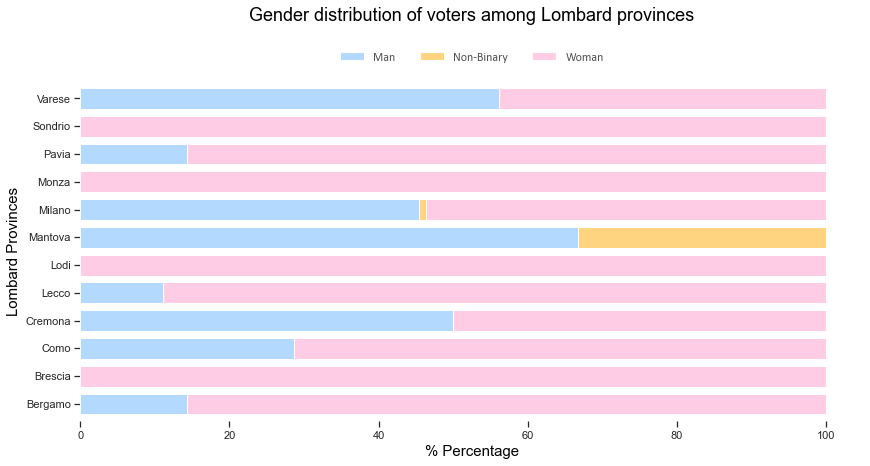

In [966]:
sns.set(rc={'figure.figsize':(17,7)})
sns.set_style('ticks')

colors = ['#b3d9ff','#ffd480', '#ffcce6']

df_percentage_gender.groupby(['User_Province','User_Gender']).sum().unstack().plot(kind= 'barh',
                                                                           y= 'Percentage',
                                                                           stacked = True,
                                                                           width=0.75,
                                                                           color=colors)
legend = plt.legend(loc='center',
                    frameon=False,
                    bbox_to_anchor=(0., 1.02, 1., .102),  
                    ncol=5, 
                    borderaxespad=-.16,
                    prop={'size': 12, 'family':'Calibri'})

for text in legend.get_texts():
    plt.setp(text, color='#525252')

title = plt.title('Gender distribution of voters among Lombard provinces', pad=60, fontsize=18, color='#000000')
title.set_position([.5, 1])
plt.subplots_adjust(top=0.8, left=0.26)

plt.xlabel('% Percentage', fontsize=15, color='#000000')
plt.ylabel('Lombard Provinces', fontsize=15, color='#000000')

sns.despine(left=True, bottom=True, top=True, right=True)

plt.show()

In [967]:
# From this visualization I can see how principally voters among lombard provices are Female,
# especially in Sondrio, Monza and Brescia, where 100% of voters are women.
# Non-Binary voters are only in Mantova and Milan.
# Overall, just in Varese an Mantova men voters exceed women.

In [968]:
# Here Now I want to visualize how the temperature set in the voter's house is among different type of heating systems.
# In order to do that I will visualize a distribution plot groubing the dataset by different heating systems and house temperatures.

In [969]:
df_heatingsystem_temperature = df_survey.groupby(['Heating_System', 'House_Temp']).size()

In [970]:
df_heatingsystem_total = df_survey.groupby('Heating_System').size()

In [971]:
df_heatingsystem_percentage = (df_heatingsystem_temperature/df_heatingsystem_total)*100

In [972]:
df_percentage_heatingsystem = df_heatingsystem_percentage.to_frame()
df_percentage_heatingsystem = df_percentage_heatingsystem.reset_index()
df_percentage_heatingsystem = df_percentage_heatingsystem.rename(columns= {0: 'Percentage'})
decimals = 1    
df_percentage_heatingsystem['Percentage'] = df_percentage_heatingsystem['Percentage'].apply(lambda x: round(x, decimals))

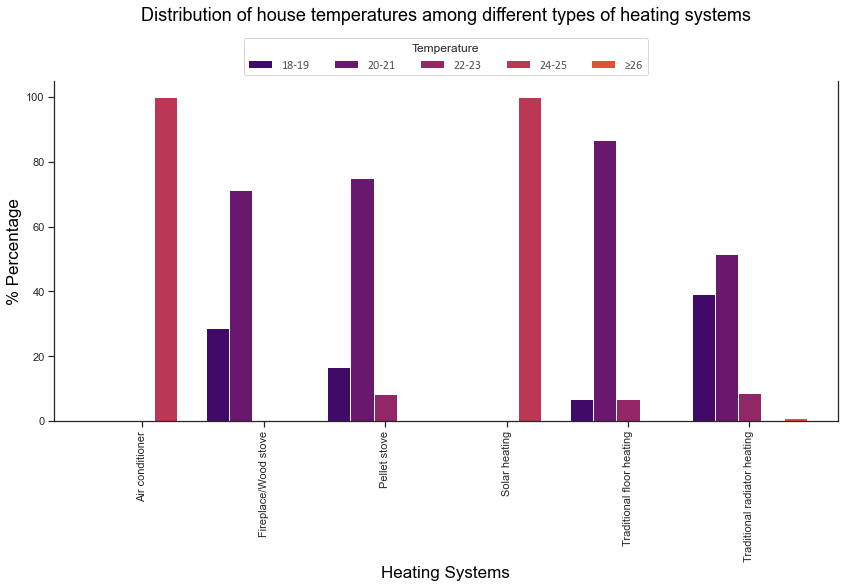

In [973]:
sns.set(rc={'figure.figsize':(17,7)})
sns.set_style('ticks')

colors = cm.inferno(np.linspace(.2, .9, 8))

df_percentage_heatingsystem.groupby(['Heating_System','House_Temp']).sum().unstack().plot(kind='bar',
                                                                           y= 'Percentage',
                                                                           stacked = False,
                                                                           width=0.95,
                                                                           color=colors)
legend = plt.legend(title='Temperature',
                    loc='center',
                    frameon=True,
                    bbox_to_anchor=(0., 1.02, 1., .102),  
                    ncol=5, 
                    borderaxespad=-.16,
                    prop={'size': 12, 'family':'Calibri'})

for text in legend.get_texts():
    plt.setp(text, color='#525252')

title = plt.title('Distribution of house temperatures among different types of heating systems', pad=60, fontsize=18, color='#000000')
title.set_position([.5, 1])
plt.subplots_adjust(top=0.8, left=0.26)

plt.xlabel('Heating Systems', fontsize=17, color='#000000')
plt.ylabel('% Percentage', fontsize=17, color='#000000')

sns.despine(left=False, bottom=False, top=True, right=False)

plt.show()

In [974]:
# This plot is biased by the enormous difference between number of voters who actually expressed their main type of heating system
# Which is mostly represented by traditional floor and radiator systems.
# But at the same time is possible to see how the house temperature is set higher in case of non-traditional heating systems
# as well as with greener heating systems, such as solar systems or air conditioner.

In [975]:
# This visualization aims to plot the number of KMs driven every week by voters who adopted as transpaortain means
# a non-green option, such as: Motor car, Hybrid car and Motorcycle.

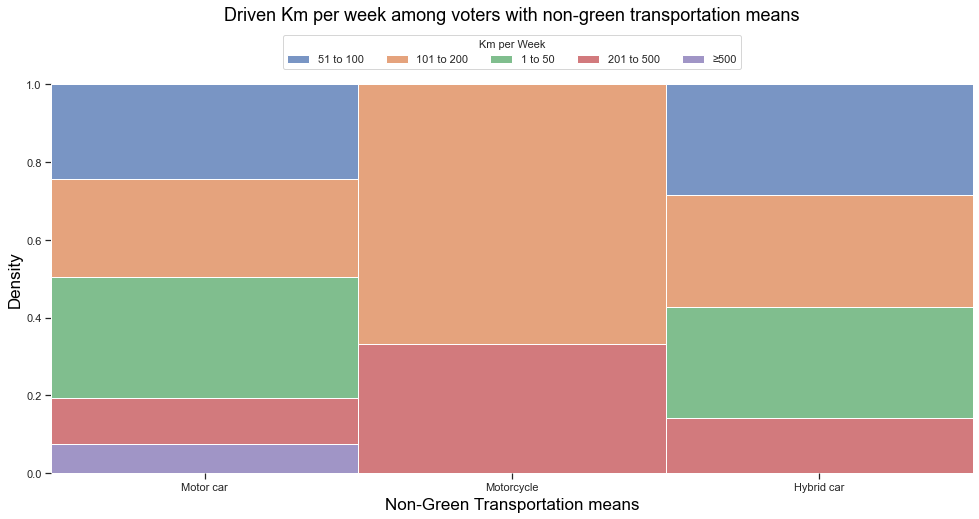

In [976]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style('ticks')

ax = sns.histplot(binwidth=0.5,
             x="Transport_Means",
             hue="KM_x_Week_Motor_Transport",
             data=df_not_green_transport_user,
             stat="density",
             multiple="fill")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1.025), ncol=5, title_fontsize=11, title='Km per Week')

title = plt.title('Driven Km per week among voters with non-green transportation means',
                  pad=60,
                  fontsize=18,
                  color='#000000')

title.set_position([.5, 1.01])
plt.subplots_adjust(top=0.8, left=0.26)

plt.xlabel('Non-Green Transportation means', fontsize=17, color='#000000')
plt.ylabel('Density', fontsize=17, color='#000000')

sns.despine(left=True, bottom=True, top=True, right=True)
plt.show()

In [977]:
# From this density plot is possible to see how the KM driven y motor cars and hybrid cars are equally distributed
# among voters.
# Motorcycles are driven only for 101/200 km per week as well as 201/500 per week.
# Only motor cars show voters who actually drive their transportation means for more than 500 km per week,
# representing approximately 10% of them.

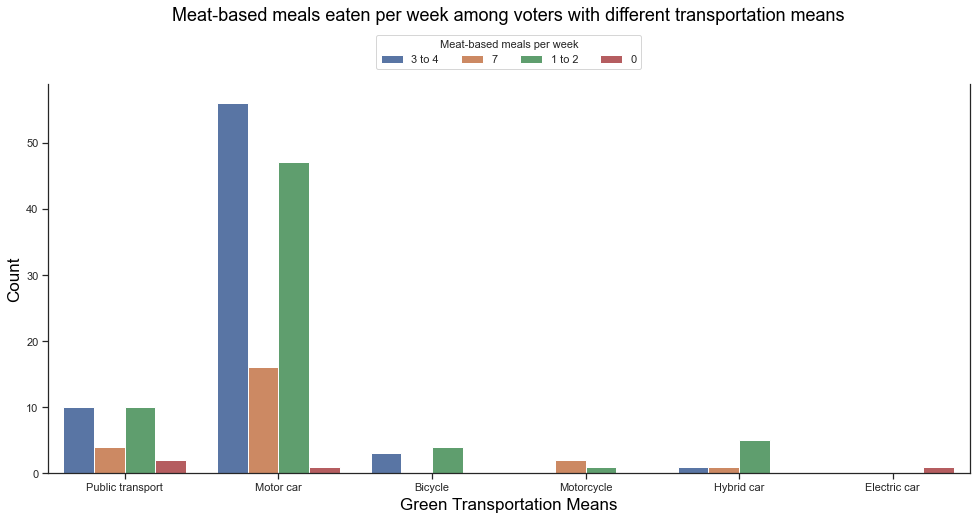

In [978]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style('ticks')

ax1 = sns.countplot(x="Transport_Means", hue="Days_meatmeal_x_Week", data=df_survey)

sns.move_legend(ax1, loc="lower center",
                bbox_to_anchor=(.5, 1.025),
                ncol=4, title_fontsize=11,
                title='Meat-based meals per week')

title = plt.title('Meat-based meals eaten per week among voters with different transportation means',
                  pad=60,
                  fontsize=18,
                  color='#000000')

title.set_position([.5, 1.01])
plt.subplots_adjust(top=0.8, left=0.26)

plt.xlabel('Green Transportation Means', fontsize=17, color='#000000')
plt.ylabel('Count', fontsize=17, color='#000000')

sns.despine(left=False, bottom=False, top=True, right=False)

plt.show()

In [979]:
# Voters who selected as main transportation means public transport and electric car also selected 0 as number
# or meat based meals.
# Voters who selected a non-green transportation means,
# such as motor car or motorcycle or hybrid car tend to eat meat based meals during the week.

In [980]:
# Here I show the gender distribution among voters who own a fireplace in their homes.
# To do that I create two sub-dataset with two conditions,
# one equals for men who have a fireplace and the second for women who have the same.

In [981]:
df_fireplace_men = df_survey.loc[(df_survey["Fireplace"] == 1) & (df_survey["User_Gender"] == 'Man')]

In [982]:
df_fireplace_women = df_survey.loc[(df_survey["Fireplace"] == 1) & (df_survey["User_Gender"] == 'Woman')]

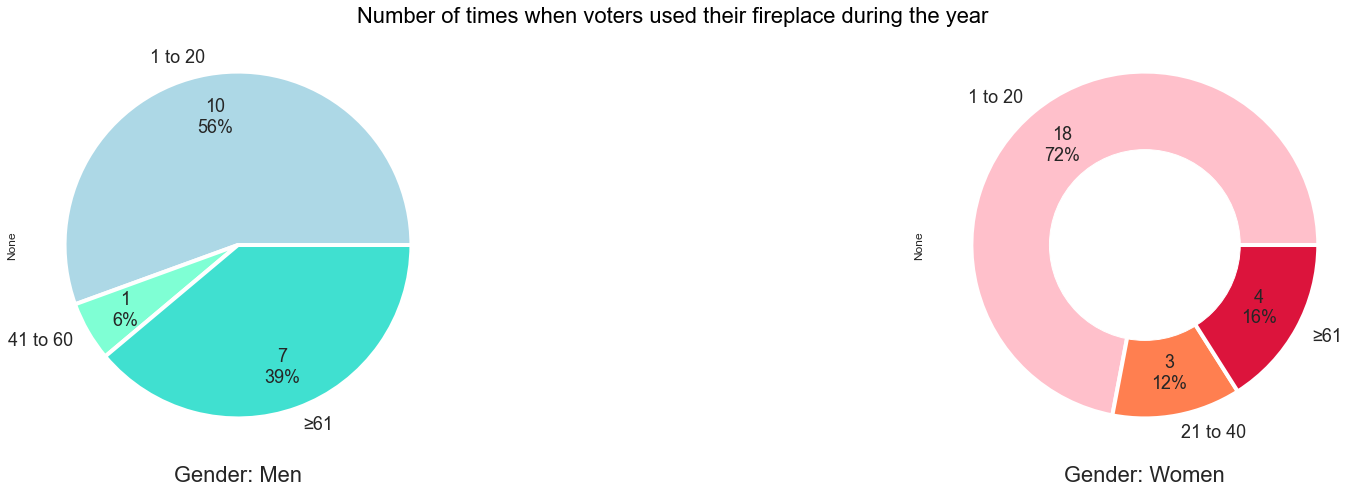

In [983]:
def label_function1(val):
    return f'{val / 100 * len(df_fireplace_men):.0f}\n{val:.0f}%'

def label_function2(val):
    return f'{val / 100 * len(df_fireplace_women):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(19, 7))

my_circle = plt.Circle( (0,0), 0.55, color='white')

df_fireplace_men.groupby('N_x_Year_Fireplace').size().plot(kind='pie', autopct=label_function1,
                                                           textprops={'fontsize': 18},
                                                           colors=['lightblue', 'aquamarine', 'turquoise', 'azure'],
                                                           ax=ax1,
                                                           wedgeprops = { 'linewidth' : 4, 'edgecolor' : 'white' },
                                                           pctdistance=0.75)

df_fireplace_women.groupby('N_x_Year_Fireplace').size().plot(kind='pie', autopct=label_function2,
                                                             textprops={'fontsize': 18},
                                                             colors=['pink', 'coral', 'crimson', 'violet'],
                                                             ax=ax2,
                                                             wedgeprops = { 'linewidth' : 4, 'edgecolor' : 'white' },
                                                             pctdistance=0.75)

title = plt.title('Number of times when voters used their fireplace during the year',
                  pad=1,
                  fontsize=22,
                  color='#000000')

title.set_position([-0.59, 1.01])
plt.subplots_adjust(top=0.8, left=0.26)

ax1.set_xlabel('Gender: Men', size=22)
ax2.set_xlabel('Gender: Women', size=22)

p = plt.gcf()
p.gca().add_artist(my_circle)

plt.tight_layout()
plt.show()

In [984]:
# The visualization shows how mostly of the voters who actually have a fireplce use it no more than 20 times per year.
# Specifically, Men tend to use fireplace more than women as the amount of 61 times is higher than female one.
# As well as the option 41 to 60 is present into the sub-dataframe for men but not for the women one.

In [985]:
df_18_24 = df_survey.loc[(df_survey["User_Age"] == '18 - 24')]
df_25_30 = df_survey.loc[(df_survey["User_Age"] == '25 - 30')]
df_31_40 = df_survey.loc[(df_survey["User_Age"] == '31 - 40')]
df_41_50 = df_survey.loc[(df_survey["User_Age"] == '41 - 50')]
df_51_60 = df_survey.loc[(df_survey["User_Age"] == '51 - 60')]

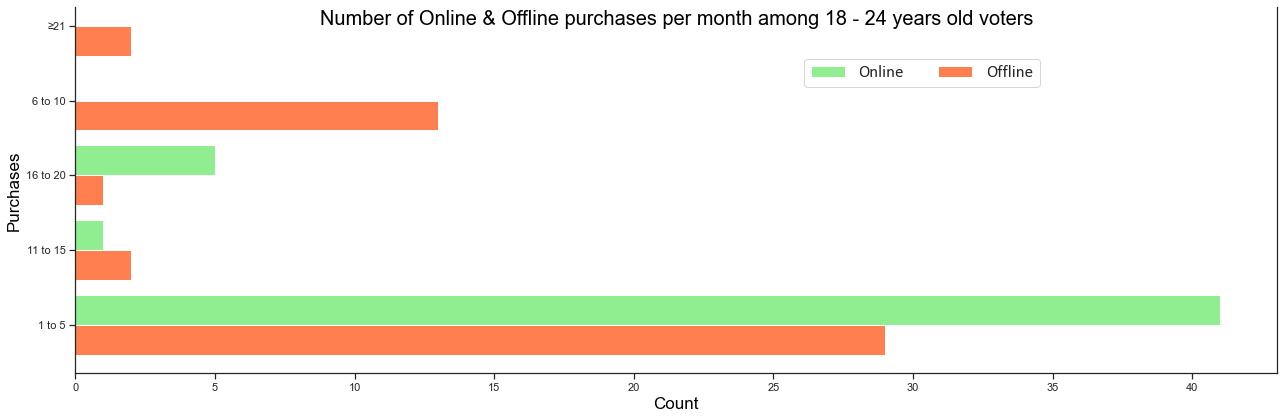

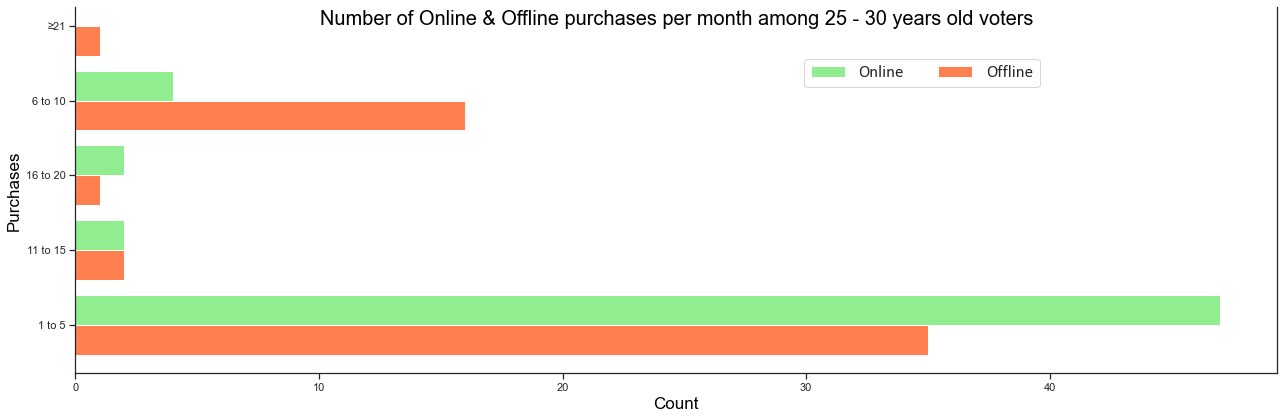

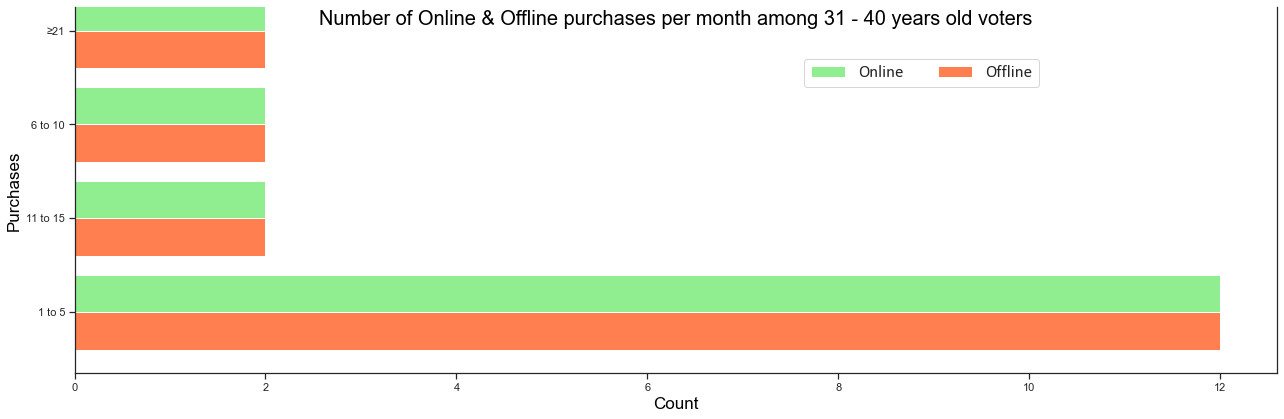

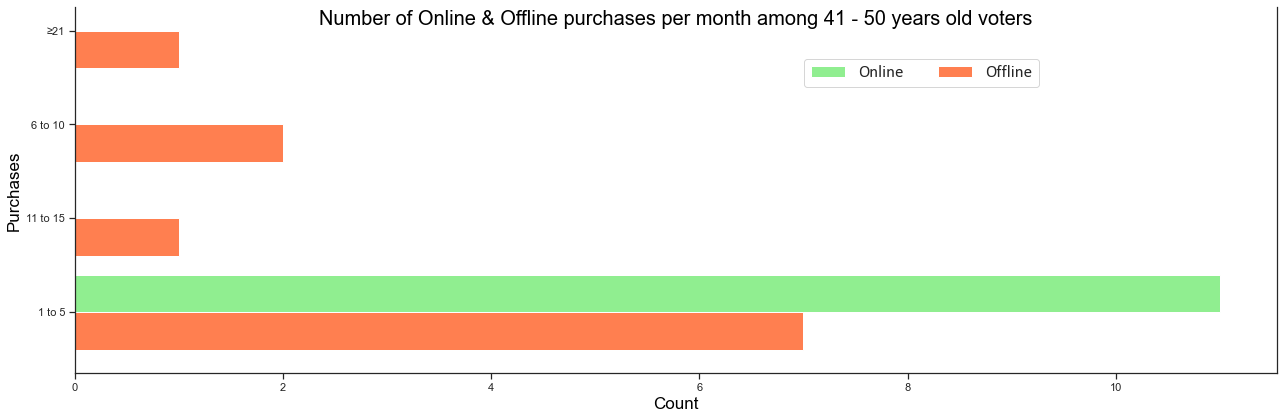

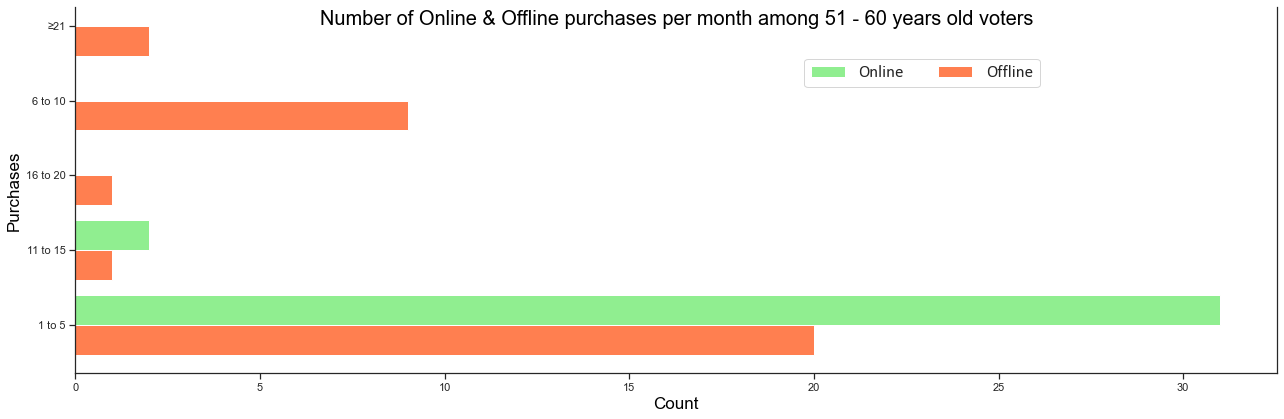

In [1002]:
##### Sub-Dataframe 18 - 24 years old voters:
sns.set(rc={'figure.figsize':(18, 6)})
sns.set_style('ticks')
ax = plt.gca()
df_18_24.groupby(['N_On-Line_Purchase_x_Month']).size().T.plot(kind='barh', stacked=True,
                                                               ax=ax, width=0.4, position=0, color='lightgreen')
df_18_24.groupby(['N_Off-Line_Purchase_x_Month']).size().T.plot(kind='barh', stacked=True,
                                                                ax=ax, width=0.4, position=1, color='coral')
title = plt.title('Number of Online & Offline purchases per month among 18 - 24 years old voters',
                  pad=1, fontsize=20, color='#000000')
title.set_position([0.5, 0.95])
plt.subplots_adjust(top=0.8, left=0.26)
plt.xlabel('Count', fontsize=17, color='#000000')
plt.ylabel('Purchases', fontsize=17, color='#000000')
mylabels= ['Online','Offline']
plt.legend(loc='upper right', frameon=True, bbox_to_anchor=(-0.2, 0.75, 1., .102),
           ncol=2, borderaxespad=-.16, prop={'size': 17, 'family':'Calibri'}, labels=mylabels)
sns.despine(left=False, bottom=False, top=True, right=False)
plt.tight_layout()
plt.show()

##### Sub-Dataframe 25 - 30 years old voters:
sns.set(rc={'figure.figsize':(18, 6)})
sns.set_style('ticks')
ax = plt.gca()
df_25_30.groupby(['N_On-Line_Purchase_x_Month']).size().T.plot(kind='barh', stacked=True,
                                                               ax=ax, width=0.4, position=0, color='lightgreen')
df_25_30.groupby(['N_Off-Line_Purchase_x_Month']).size().T.plot(kind='barh', stacked=True,
                                                                ax=ax, width=0.4, position=1, color='coral')
title = plt.title('Number of Online & Offline purchases per month among 25 - 30 years old voters',
                  pad=1, fontsize=20, color='#000000')
title.set_position([0.5, 0.95])
plt.subplots_adjust(top=0.8, left=0.26)
plt.xlabel('Count', fontsize=17, color='#000000')
plt.ylabel('Purchases', fontsize=17, color='#000000')
mylabels= ['Online','Offline']
plt.legend(loc='upper right', frameon=True, bbox_to_anchor=(-0.2, 0.75, 1., .102),
           ncol=2, borderaxespad=-.16, prop={'size': 17, 'family':'Calibri'}, labels=mylabels)
sns.despine(left=False, bottom=False, top=True, right=False)
plt.tight_layout()
plt.show()

##### Sub-Dataframe 31 - 40 years old voters:
sns.set(rc={'figure.figsize':(18, 6)})
sns.set_style('ticks')
ax = plt.gca()
df_31_40.groupby(['N_On-Line_Purchase_x_Month']).size().T.plot(kind='barh', stacked=True,
                                                               ax=ax, width=0.4, position=0, color='lightgreen')
df_31_40.groupby(['N_Off-Line_Purchase_x_Month']).size().T.plot(kind='barh', stacked=True,
                                                                ax=ax, width=0.4, position=1, color='coral')
title = plt.title('Number of Online & Offline purchases per month among 31 - 40 years old voters',
                  pad=1, fontsize=20, color='#000000')
title.set_position([0.5, 0.95])
plt.subplots_adjust(top=0.8, left=0.26)
plt.xlabel('Count', fontsize=17, color='#000000')
plt.ylabel('Purchases', fontsize=17, color='#000000')
mylabels= ['Online','Offline']
plt.legend(loc='upper right', frameon=True, bbox_to_anchor=(-0.2, 0.75, 1., .102),
           ncol=2, borderaxespad=-.16, prop={'size': 17, 'family':'Calibri'}, labels=mylabels)
sns.despine(left=False, bottom=False, top=True, right=False)
plt.tight_layout()
plt.show()

##### Sub-Dataframe 41 - 50 years old voters:
sns.set(rc={'figure.figsize':(18, 6)})
sns.set_style('ticks')
ax = plt.gca()
df_41_50.groupby(['N_On-Line_Purchase_x_Month']).size().T.plot(kind='barh', stacked=True,
                                                               ax=ax, width=0.4, position=0, color='lightgreen')
df_41_50.groupby(['N_Off-Line_Purchase_x_Month']).size().T.plot(kind='barh', stacked=True,
                                                                ax=ax, width=0.4, position=1, color='coral')
title = plt.title('Number of Online & Offline purchases per month among 41 - 50 years old voters',
                  pad=1, fontsize=20, color='#000000')
title.set_position([0.5, 0.95])
plt.subplots_adjust(top=0.8, left=0.26)
plt.xlabel('Count', fontsize=17, color='#000000')
plt.ylabel('Purchases', fontsize=17, color='#000000')
mylabels= ['Online','Offline']
plt.legend(loc='upper right', frameon=True, bbox_to_anchor=(-0.2, 0.75, 1., .102),
           ncol=2, borderaxespad=-.16, prop={'size': 17, 'family':'Calibri'}, labels=mylabels)
sns.despine(left=False, bottom=False, top=True, right=False)
plt.tight_layout()
plt.show()

##### Sub-Dataframe 51 - 60 years old voters:
sns.set(rc={'figure.figsize':(18, 6)})
sns.set_style('ticks')
ax = plt.gca()
df_51_60.groupby(['N_On-Line_Purchase_x_Month']).size().T.plot(kind='barh', stacked=True,
                                                               ax=ax, width=0.4, position=0, color='lightgreen')
df_51_60.groupby(['N_Off-Line_Purchase_x_Month']).size().T.plot(kind='barh', stacked=True,
                                                                ax=ax, width=0.4, position=1, color='coral')
title = plt.title('Number of Online & Offline purchases per month among 51 - 60 years old voters',
                  pad=1, fontsize=20, color='#000000')
title.set_position([0.5, 0.95])
plt.subplots_adjust(top=0.8, left=0.26)
plt.xlabel('Count', fontsize=17, color='#000000')
plt.ylabel('Purchases', fontsize=17, color='#000000')
mylabels= ['Online','Offline']
plt.legend(loc='upper right', frameon=True, bbox_to_anchor=(-0.2, 0.75, 1., .102),
           ncol=2, borderaxespad=-.16, prop={'size': 17, 'family':'Calibri'}, labels=mylabels)
sns.despine(left=False, bottom=False, top=True, right=False)
plt.tight_layout()
plt.show()

In [987]:
# 1 to 5 is highly the first option voted among all age targets;
# Overall younger voters tend to buy more online rather then offline - from 18 to 40,
# opposite result for older voters - from 41 to 60;
# Age target 31 to 40 are absolutly equal by given answers;


In [988]:
# Set new first new dataframe column as User

In [989]:
df_survey['User'] = np.arange(len(df_survey))+1

In [990]:
cols = [df_survey.columns[-1]] + [col for col in df_survey if col != df_survey.columns[-1]]
df_survey = df_survey[cols]

In [991]:
# Being deeply unproportionated the survey dataset from the province point of view distribution,
# User_Province is now dropped:

In [992]:
df_survey = df_survey.drop(['User_Province'], axis=1)

In [993]:
# Save cleaned final csv file with the name of df_survey_final:

In [994]:
df_survey.to_csv('df_survey_final.csv', index=False)

In [ ]:
# Import last final dataframe and quick overview:

In [995]:
df_survey_final = pd.read_csv("df_survey_final.csv")

In [1001]:
#df_survey_final.head(10)
#df_survey_final.shape
#df_survey_final.info()